# Introduction à la programmation Python

Julien Velcin, Université Lyon 2

Formation doctorale de l'UdL (2021-2022)

## TP n°2 : première analyse des donnnées textuelles

### Menu ###
- manipulation de chaînes de caractères (*str*)
- recherche simple : les expressions régulières
- premiers nettoyages du texte
- visualisation en nuage de mots

Nous allons travailler avec un extrait des données du <a href="https://granddebat.fr">Grand Débat National</a>, en particulier des réponses à la question : "En qui faites-vous le plus confiance pour vous faire représenter dans la société et pourquoi ?"

Commencez par charger le fichier *csv* en mémoire. Pour cela, vous pouvez passer par la librairie *pandas*. Si besoin, vous pouvez préciser l'encodage *utf-8* et la présence (ou non) d'un en-tête avec *header*.

In [1]:
import pandas as pd

df = pd.read_csv("datasets/gd_qui.csv", sep="\t", encoding='utf8', header=None)      

On commence par créer une seule chaîne de caractères, que vous appelerez **texte**, qui **concatène** toutes les réponses qui se trouvent dans la colonne 2 du tableau que vous venez de charger (par ex. avec la fonction *join*). Les deux premières lignes ne sont pas très utiles : dans la suite, arrangez-vous pour travailler avec la liste privée de ces éléments.

Si vous êtes genés par les valeurs manquantes N/A, *pandas* fournit une commande *isna* qui peut être utilisée pour ne conserver que les lignes valides.

In [2]:
texte = "".join(line.rstrip("\n") for line in df[1][2:] if pd.isna(line)==False)

Vérifiez la taille de la chaîne avec *len* et regardez des extraits de cette longue chaîne.

In [3]:
# attention, ici il s'agit bien d'une unique chaîne de caractères (string) = tableau où chaque case est un caractère de la chaîne

print(len(texte))
texte[888:1200]

7468756


'ésentés aux enquêtes qui peuvent, parfois, peser plusieurs kilos, sont illisibles, inexploitables, incompréhensibles. Enfin, les enquêteurs publics, de plus en plus issus de la haute fonction publique, du corps des officiers supérieurs de l’armée ou de cabinets d’études environnementaux ou d’urbanisme, de notab'

La recherche la plus simple consiste à parcourir le texte jusqu'à trouver la première occurrence d'une chaîne de caractères. Cela peut se faire à l'aide de la fonction *find*.

Vérifiez que le passage du texte qui entoure l'indice trouvé correspond bien à ce que vous cherchez.

In [4]:
start = texte.find('Sarkozy')

print(start)
print(texte[start-10:start+20])

304035
ngtemps : Sarkozy, Gaudin, LeP


Les **expressions régulières** constituent une méthode très efficace pour trouver une ou plusieurs occurrences d'une sous-chaîne de caractères dans un texte.

Lien vers la page documentant la librairie re en Python : https://docs.python.org/3/library/re.html

Pour commencer, enregistrez dans une liste l'indice de toutes les occurrences d'un mot choisi avec la fonction *finditer* de la librairie *re*. Pour le moment, il s'agit de l'écriture exact du mot. L'indice correspond à l'endroit où débute le mot (fonction *start* de l'objet retourné).

En Python :

p = re.compile(motif)

r = p.finditer(texte)

liste_occ = [m.start() for m in r]

In [5]:
import re
pattern = re.compile("Sarkozy")

# cherche toutes les occurrences
res = pattern.finditer(texte)

start_pattern = [m.start() for m in res]

print("{} occurrences trouvées".format(len(start_pattern)))

37 occurrences trouvées


Il est facile de réaliser les analyses sans tenir compte de la "casse", c'est-à-dire de l'utilisation des majuscules et minuscules, en rajoutant l'option *re.IGNORECASE* dans la fonction *compile*. Essayez cette fonctionnalité.

In [6]:
import re # notez qu'importer à nouveau la librairie n'est pas nécessaire
pattern = re.compile("Sarkozy", re.IGNORECASE)

# cherche toutes les occurrences
res = pattern.finditer(texte)

start_pattern = [m.start() for m in res]

print("{} occurrences trouvées".format(len(start_pattern)))

42 occurrences trouvées


Si on souhaite trouver toutes les occurrences, on peut afficher ce qu'on appelle un concordancier.

Depuis le XIIIème siècle, un **concordancier** est une liste triée alphabétiquement des principaux mots employés dans un corpus, précisant **chaque instance** des mots accompagnée de leur **contexte immédiat**. 

<img src="img/concordance.jpg" style='height: 400px'/>

*Cruden's Concordance (concordance of the King James Bible that was single-handedly created by Alexander Cruden)*

In [7]:
window = 50

def concord(texte, pat):
    pattern = re.compile(pat)
    res = pattern.finditer(texte)
    pos_pattern = [m.span() for m in res]
    context_left = pd.DataFrame([texte[i-window:i-1] for (i, j) in pos_pattern])
    center = pd.DataFrame([texte[i: j] for (i, j) in pos_pattern])
    context_right = pd.DataFrame([texte[j:j+window] for (i, j) in pos_pattern])
    return (pd.concat([context_left, center, context_right], axis=1))

Vous pouvez utiliser le concordancier afin de tester plusieurs expressions régulières sur le corpus.

Faîtes quelques essais avec des expressions :

- comportant plusieurs mots qui se suivent : "mot1 mot2"
- autorisant la présence optionnelle d'un caractère avec ? comme : "mot?" (le t est optionnel)
- donnant le choix entre plusieurs mots avec : "mot1|mot2"
- comportant une suite de chiffres avec : "[0-9]+"

In [8]:
# suite exacte :
concord(texte, "Nicolas Sarkozy")

# présence optionnelle d'un caractère :
#concord(texte, "Sarkoz?y?")

# recherche de deux motifs :
#concord(texte, "Sarkozy|Sarkosy")    # le | (ou "pipe") indique un OU logique

# chiffre :
#concord(texte, "[0-9]")

# suite de chiffres :
#concord(texte, "[0-9]+")   # le + indique qu'il doit au moins y avoir un chiffre

,0,0,0
0,"at du referendum de mai 2005, résultat balayé par",Nicolas Sarkozy,qui a nié l'opinion des français... Cette dat...
1,et leurs attitudes envers le peuple et entre eux,Nicolas Sarkozy,"(Bettencourt, Kadafi,...), Patrick Balkany (M..."
2,"dget de plusieurs milliards d'Euro , commandé par",Nicolas Sarkozy,", dont le rapporteur est Mr Perruchot, j'ai l..."
3,fants . Tous les politiques m'ont déçue y compris,Nicolas Sarkozy,qui voulait faire un geste pour ces enfants ...
4,t en danger et la représentativité des élus comme,Nicolas Sarkozy,", Jérôme Kahuzac, Marine le Pen, Jacques Chira..."
5,lus affluentesPersonne malheureusement. Exemple :,Nicolas Sarkozy,a nié le résultat du référendum de la constit...
6,n inefficacité. Il suffit de revoir le mandat de,Nicolas Sarkozy,ou celui de François Hollande. Déjà repartis ...
7,"que de l'indemnisation. EN Mai 2007, le Président",Nicolas Sarkozy,avait confirmé sa volonté de mettre un terme ...
8,le projet de traité de constitution européenne.,Nicolas Sarkozy,"avec les principaux dirigeants du PS, du MODE..."


Quelques exercices de plus sur les expressions régulières :

- Trouver les extraits contenant deux suites de caractères (alphabet a à z, non accentué) en minuscules attachés par un *underscore* (par ex. "choisi_s")
- Même question mais avec des caractères en minuscules ou en majuscules (par ex. "Bicamerisme_equitableL")
- Trouver les extraits contenant deux mots (cette fois en prenant en compte les accents) qui se suivent et commençant chacun par une (unique) majuscule
- Trouver les extraits qui alterne un chiffre et une lettre deux fois de suite (par ex. "1a0d")

In [9]:
concord(texte, "[a-z]+_[a-z]+")

#concord(texte, "[a-zA-Z]+_[a-zA-Z]+")

#concord(texte, "[A-Z][a-zéèêàîùû]* [[A-Z][a-zéèêàîùû]*")

#concord(texte, "([0-9][a-z]){2}")

,0,0,0
0,plus laisser le temps faire avancer les choses.Le,mairemoi_m,ême ou mon avocat aucune confiance en la just...
1,"in dit <b><a href=""https://fr.wikipedia.org/wiki/",ugement_majoritaire,""" target=""_blank"">Jugement Majoritaire</a></b>..."
2,enté. Référence : https://fr.wikipedia.org/wiki/D,mocratie_liquideles,"mairesMaireMaireaujourd'hui, je ne sais pas....."
3,sulmane essentiellement avec la migration nord et,sub_saharienne,voulu par par certains de nos gouvernants. Do...
4,le type de décisions . Les députés par ex. sont,choisi_s,"d'abord sur les options politiques, moins sur..."
5,on se trouve ici : https://fr.wikipedia.org/wiki/,ugement_majoritairele,maire et le président de la république : le p...
6,ntairement-pas-profite-des-outils-numeriques-a-sa,disposition_a,_23649523/?fbclid=IwAR020G-qBoZfWWqWrzOz8R82lY...
7,emocratie liquide https://fr.wikipedia.org/wiki/D,mocratie_liquide,Par contre je trouve ça absurde que des repré...
8,ois et ensuite revenus en faisant de très grosses,plus_value,La multiplications de revendeurs d'énergie n'...
9,de fait aléatoire. https://fr.wikipedia.org/wiki/,crutin_de,_Condorcet_randomis%C3%A9des citoyens sans arr...


## Premiers nettoyages

L'action la plus élémentaire consiste à nettoyer le texte s'il contient des symboles non souhaités (par ex. des caractères unicodes). La librairie *re* fournit une fonction *sub* qui permet de faire ce remplacement en prenant en compte des expressions régulières si besoin, càd en fournissant un motif comme nous l'avons fait précédemment.

In [10]:
txt_a_nettoyer = "ÅVoilà un texte qui pose problͰme  ̶ voyons ce que l ̕on peut y faire"

txt_propre = re.sub("Å", " ", txt_a_nettoyer)
txt_propre = re.sub("Ͱ", "è", txt_propre)
txt_propre = re.sub(" ̶", "-", txt_propre)
txt_propre = re.sub(" ̕", "'", txt_propre)

print(txt_propre)

 Voilà un texte qui pose problème - voyons ce que l'on peut y faire


Ou alors avec un dictionnaire :

In [11]:
clean_unicode = {
  "Å": " ",
  "Ͱ": "è",
  " ̶" : "-",
  " ̕" : "'"
}

txt_propre_2 = txt_a_nettoyer
for c in clean_unicode:
    txt_propre_2 = re.sub(c, clean_unicode[c], txt_propre_2)
    
print(txt_propre_2)

 Voilà un texte qui pose problème - voyons ce que l'on peut y faire


Repérez puis corriger quelques fautes d'orthographes dans le texte dans une nouvelle version de la variable que vous appelerez **texte_clean**.

In [12]:
def nettoyage(t, dico):
    t_n = t
    for c in dico:
        t_n = re.sub(c, dico[c], t_n, flags=re.I)
    return t_n

In [13]:
# par exemple...
nettoyage_GD = {
  "Sarkozi": "Sarkozy",
  "Sarko ": "Sarkozy",
}

texte_clean = nettoyage(texte, nettoyage_GD)

N'hésitez pas à vérifier que les modifications ont bien été réalisées avec le concordancier.

Un nettoyage standard pour les analyses ultérieures consiste à passer tout le corpus en minuscule. C'est une forme de normalisation permettant de rapprocher des termes comme "Unité" et "unité" par exemple.

Pour les analyzes qui suivent, transformer votre variable *texte_clean* pour passer tous les caractères en minuscules.

In [14]:
print("avant : ", texte[1500:1600])
print("après : ", texte[1500:1600].lower())

texte_clean = texte_clean.lower()

avant :  ectuées. Enfin, les dispositions du Code l’Environnement laissent aux enquêteurs publics une marge d
après :  ectuées. enfin, les dispositions du code l’environnement laissent aux enquêteurs publics une marge d


## Première visualisation : le nuage de mots

Les **nuages de mots** (*word clouds*) sont une manière simple de visualiser les statistiques des mots les plus employés dans le corpus.

Première partie du code : on prépare le nuage de mots, en spécifiant si possible une liste de mots-outils à ignorer (le, la, etc.)

In [15]:
# Les deux lignes suivantes permettent de télécharger des ressources avec la libraries nltk
# (ce qui nous intéresse pour le moment : une liste de mots-outils)
#import nltk
#nltk.download()

In [16]:
# alternative à nltk pour charger des mots-outils (stopwords) directement depuis un fichier :

with open("Stop-words-french.txt", "r", encoding='utf8') as f:
    sw_french = [line.rstrip("\n") for line in f.readlines()]

Vérifiez le contenu de la liste et sa longueur.

In [17]:
#len(sw_french)   # nombre de mots-outils
sw_french[0:20] # 20 premiers mots-outils

['à',
 'absolument',
 'actuellement',
 'ainsi',
 'alors',
 'apparemment',
 'approximativement',
 'apr\x8fs',
 'apr\x8fs-demain',
 'assez',
 'assurément',
 'assurement',
 'au',
 'aucun',
 'aucunement',
 'aucuns',
 "aujourd'hui",
 'auparavant',
 'aussi',
 'aussitôt']

In [18]:
# tiré de : http://ramiro.org/notebook/sherlock-holmes-canon-wordcloud/

from wordcloud import WordCloud

# si on souhaite charger la liste des mots-outils en français avec NLTK
# (inutile si on charge son propre fichier de mots-outils)

# from nltk.corpus import stopwords 
# sw_french = stopwords.words("french")

# si on veut enrichir la liste de mots-outils d'une liste "maison" :
#sw_french = sw_french + [..., ..., ...] # = liste de mots

# imread est nécessaire si on souhaite utiliser un masque (image en noir et blanc, le noir indiquant où afficher le nuage)
from imageio import imread

# nombre de mots à afficher
limit = 50

#fontcolor='#fafafa'
fontcolor='#fa0000' # couleur des caractères
bgcolor = '#000000' # couleur de fond
#bgcolor = '#ffffff'
#bgcolor = '#aa0000'
    
wordcloud = WordCloud(
    max_words=limit,
    stopwords= sw_french, # liste de mots-outils
    #mask=imread('img/mask.png'),  # avec ou sans masque, à essayer ! (attention, nécessite un fichier de masque en noir et blanc)
    background_color=bgcolor,
#    font_path=font   # si on veut changer la police de caractères
).generate(texte_clean) # tolower() permet de mettre tout le texte en minuscule

Seconde partie du code : on affiche le nuage grâce à la librarie matplotlib

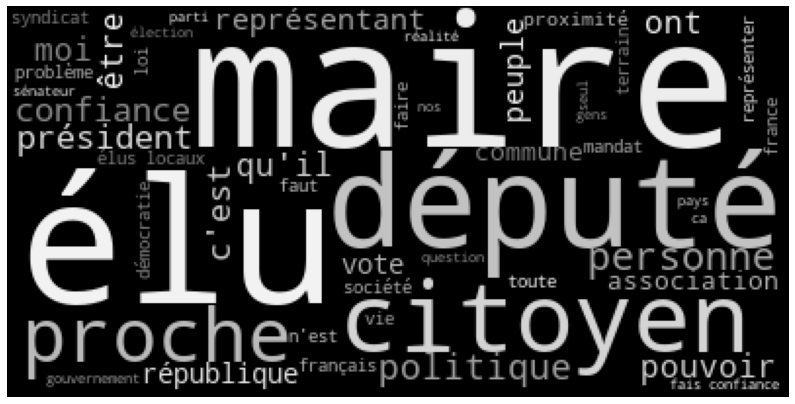

In [19]:
# cette première ligne est nécessaire pour afficher des graphiques dans le notebook
%matplotlib inline

import random
import matplotlib.pyplot as plt

fig = plt.figure()

# taille de la figure
fig.set_figwidth(14)
fig.set_figheight(18)

# si on souhaite mettre un titre
title = "Essai"

# cette fonction optionnelle permet de "customiser" l'affichage, cf. ci-dessous
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

#plt.imshow(wordcloud)     # le plus simple
plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))  # si on veut "customiser"
#plt.title(title, color=fontcolor, size=30, y=1.01)     # si on veut rajouter un titre
plt.axis('off')
plt.show()

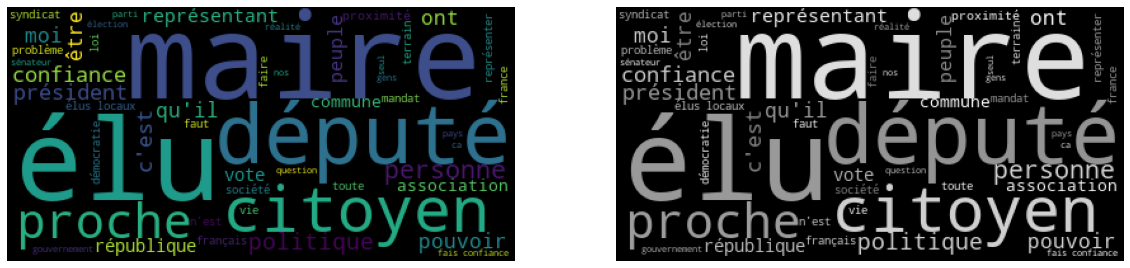

In [20]:
# Possibilité d'afficher plusieurs graphiques si besoin
fig = plt.figure()

# taille de la figure
fig.set_figwidth(20)
fig.set_figheight(18)

plt.subplot(1, 2, 1)
  # (1,2) indique que l'on souhait 1 ligne avec 2 colonnes
  # la troisème valeur correspond à l'endroit où on affiche le graphique en cours
plt.imshow(wordcloud.recolor(random_state=3))
plt.axis('off')
plt.subplot(1, 2, 2) 
  # cette fois, on affiche en 2ème position
plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.axis('off')
plt.show()
